In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os
import sys

sns.set_theme(style='whitegrid')
%matplotlib inline

tp_root = '/home/facuvulcano/Machine-Learning/TP4/'
logs_dir = os.path.join(tp_root, 'src', 'train_test', 'logs')
results_dir = os.path.join(tp_root, 'results')

os.makedirs(logs_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

script_path = os.path.join(tp_root, 'main.py')
python_executable = '/home/facuvulcano/miniconda3/envs/ML/bin/python'
working_dir = os.path.dirname(script_path)

### 1.a) Implementacion de una red neuronal multicapa densa

**Objetivo:** Entrenar una red neuronal con 3 capas ocultas, con 10, 8 y 4 neuronas respectivamente, utilizando ReLU como funcion de activacion y unn learning rate 1e-8. Se evaluara el modelo en el conjunto de validacion utilizando metricas RMSE, MAE y R2, y se graficaran las curvas de error de entrenamiento y validacion.

Ejecutando entrenamiento basico..
Salida estandar:
El script train.py ha comenzado a ejecutarse
modulos importados
Iniciando el script
entrando a funcion
Cantidad de parametros: 329
Comenzando la epoca 1
Epoca 1: Train Loss=0.2665, Val Loss=0.2476, RMSE=28059.9126, MAE=25454.7680, R2=-4.6484
Comenzando la epoca 2
Epoca 2: Train Loss=0.2665, Val Loss=0.2476, RMSE=28059.9126, MAE=25454.7680, R2=-4.6484

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_linear_lambda_0.csv

Errores:



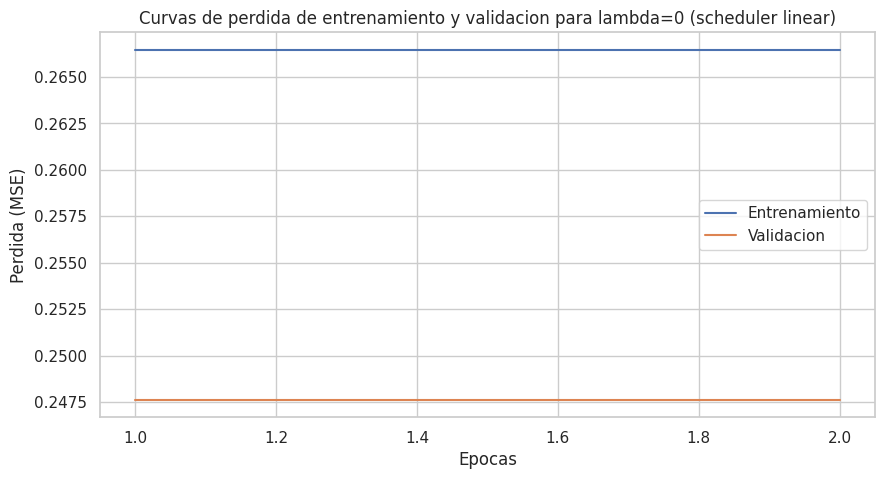

In [7]:
scheduler_type_1a = 'linear'
lambda_reg_1a = 0.0
log_file_1a = os.path.join(logs_dir, 'training_linear_lambda_0.log')
metrics_file_1a = os.path.join(results_dir, 'evaluation_metrics_linear_lambda_0.csv')

command_1a = [
    python_executable,
    script_path,
    '--scheduler_type', scheduler_type_1a,
    '--lambda_reg', str(lambda_reg_1a),
    '--log_file', log_file_1a,
    '--metrics_file', metrics_file_1a,
    '--num_epochs', '2',
    '--final_lr', '0.001'
]

print("Ejecutando entrenamiento basico..")
result_1a = subprocess.run(command_1a, cwd=working_dir, capture_output=True, text=True)

print("Salida estandar:")
print(result_1a.stdout)
print("Errores:")
print(result_1a.stderr)

metrics_1a = pd.read_csv(metrics_file_1a)
metrics_1a.head()

# Grafico de curvas de perdida de entrenamiento y validacion
plt.figure(figsize=(10, 5))
plt.plot(metrics_1a['Epoch'], metrics_1a['Train Loss'], label='Entrenamiento')
plt.plot(metrics_1a['Epoch'], metrics_1a['Val Loss'], label='Validacion')
plt.xlabel('Epocas')
plt.ylabel('Perdida (MSE)')
plt.title('Curvas de perdida de entrenamiento y validacion para lambda=0 (scheduler linear)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(results_dir, 'loss_curves_linear_lambda_0.png'))
plt.show()

### 2. Implementacion de Learning Rate Scheduelrs

**Objetivo:** Implementar diferentes estrategias de ajuste dinnamico de la tasa de aprendizaje y comaparar el rendimiento del modelo para cada una. Las variantes a explorar son:

a) Linear decay
b) Power law
c) Exponential decay

Se debe graficar la evolucion del error en funcion de las epocas para cada scheduler.

In [9]:
scheduler_configs_q2 = {
    'linear' : {'final_lr' : 1e-7},
    'power' : {'power' : 1},
    'exponential' : {'decay_rate' : 0.95}
}

lambda_reg_q2 = 0.0

results_q2 = {}

for scheduler_type, params in scheduler_configs_q2.items():
    print(f'\nEntrenando con schedulers: {scheduler_type} y lambda={lambda_reg_q2}')

    log_file_q2 = os.path.join(logs_dir, f'training_{scheduler_type}_lambda_{lambda_reg_q2}.log')
    metrics_file_q2 = os.path.join(results_dir, f'evaluation_metrics_{scheduler_type}_lambda_{lambda_reg_q2}.csv')

    command_q2 = [
        python_executable,
        script_path,
        '--scheduler_type', scheduler_type,
        '--lambda_reg', str(lambda_reg_q2),
        '--log_file', log_file_q2,
        '--metrics_file', metrics_file_q2,
        '--num_epochs', '100',
        '--batch_size', '32'
    ]

    if scheduler_type == 'linear':
        command_q2 += ['--final_lr', str(params['final_lr'])]
    elif scheduler_type == 'power':
        command_q2 += ['--power', str(params['power'])]
    elif scheduler_type == 'exponential':
        command_q2 += ['--decay_rate', str(params['decay_rate'])]

    result_q2 = subprocess.run(command_q2, cwd=working_dir, capture_output=True, text=True)

    print("Saldia estandar:")
    print(result_q2.stdout)
    print("Errores:")
    print(result_q2.stderr)

    if os.path.exists(metrics_file_q2):
        metrics_df_q2 = pd.read_csv(metrics_file_q2)
        results_q2[scheduler_type] = metrics_df_q2
    else:
        print(f'Archivo de metricas {metrics_file_q2} no encontrado.')


Entrenando con schedulers: linear y lambda=0.0
Saldia estandar:
El script train.py ha comenzado a ejecutarse
modulos importados
Iniciando el script
entrando a funcion
Cantidad de parametros: 329
Comenzando la epoca 1
Epoca 1: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 2
Epoca 2: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 3
Epoca 3: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 4
Epoca 4: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 5
Epoca 5: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 6
Epoca 6: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 7
Epoca 7: Train Loss=0.2574, Val Loss=0.2788, RMSE=29774.6616, MAE=26869.2614, R2=-4.5718
Comenzando la epoca 8
Epoca

KeyboardInterrupt: 

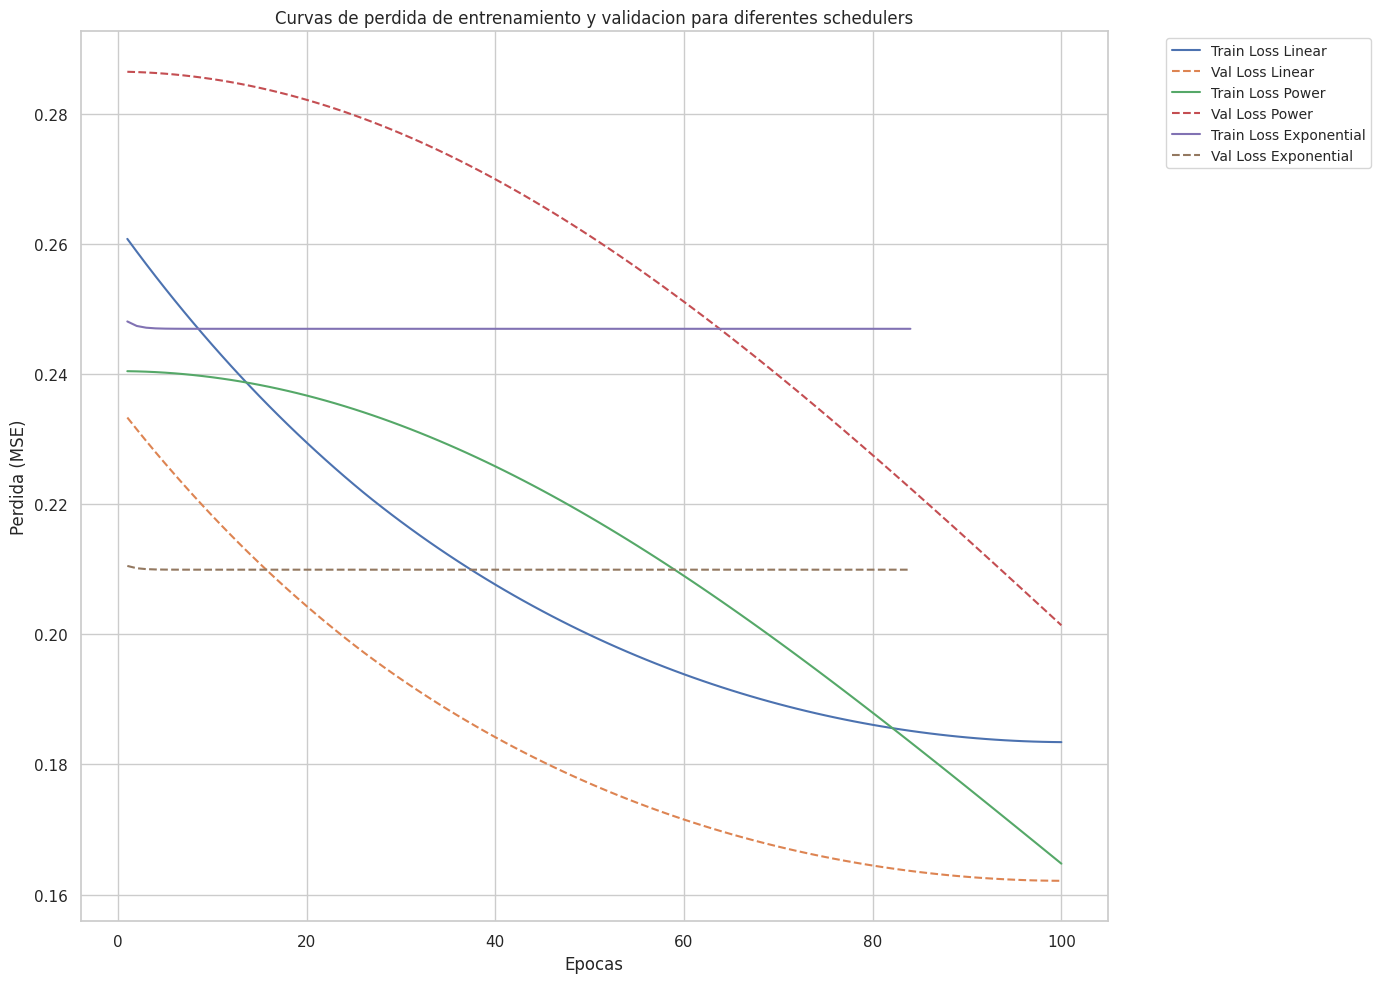

In [3]:
plt.figure(figsize=(14, 10))

for scheduler_type, metrics_df_q2 in results_q2.items():
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['Train Loss'], label=f'Train Loss {scheduler_type.capitalize()}')
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['Val Loss'], linestyle='--', label=f'Val Loss {scheduler_type.capitalize()}')

plt.xlabel('Epocas')
plt.ylabel('Perdida (MSE)')
plt.title('Curvas de perdida de entrenamiento y validacion para diferentes schedulers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'loss_curves_schedulers.png'))
plt.show()


In [4]:
metrics_list = []

for scheduler_type, metrics_df_q2 in results_q2.items():
    final_metrics = metrics_df_q2.tail(1)
    metrics_list.append({
        'scheduler'  : scheduler_type.capitalize(),
        'R2' : final_metrics['R2'].values[0],
        'RMSE' : final_metrics['RMSE'].values[0],
        'MAE' : final_metrics['MAE'].values[0]
    })

metrics_consolidated_q2 = pd.DataFrame(metrics_list)

metrics_consolidated_q2

,scheduler,R2,RMSE,MAE
0,Linear,-2.594099,22703.829255,19349.323428
1,Power,-3.115759,25304.230353,22224.182861
2,Exponential,-3.977985,25835.430426,23211.175041


/tmp/ipykernel_10852/3607900952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='R2', data=metrics_consolidated_q2, palette='viridis')


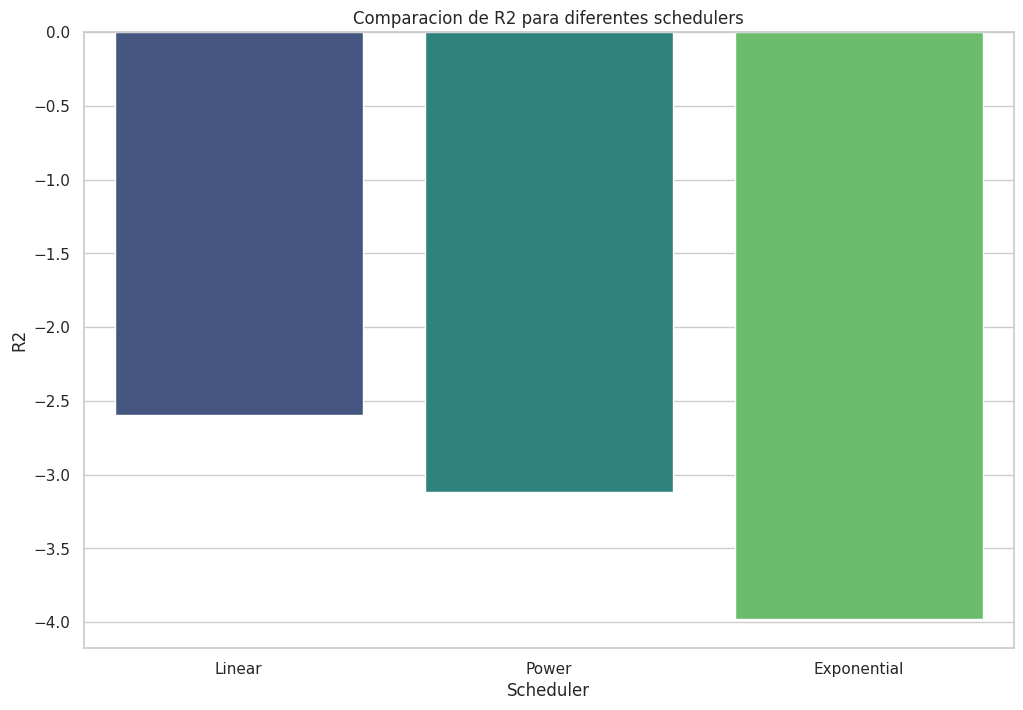

/tmp/ipykernel_10852/3607900952.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='RMSE', data=metrics_consolidated_q2, palette='magma')


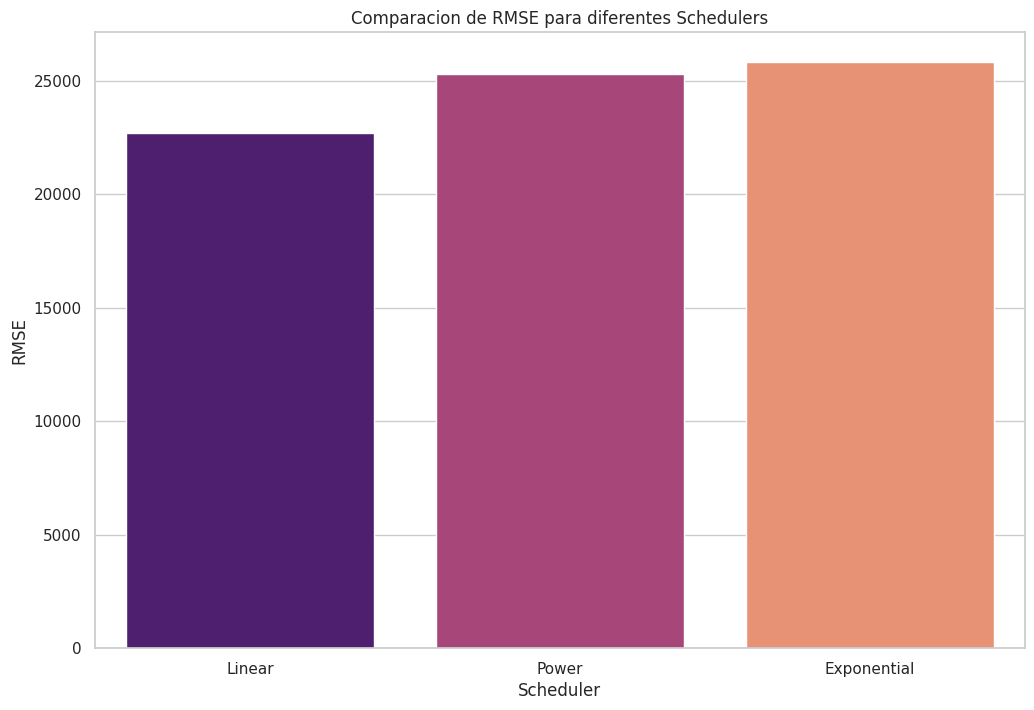

/tmp/ipykernel_10852/3607900952.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='MAE', data=metrics_consolidated_q2, palette='plasma')


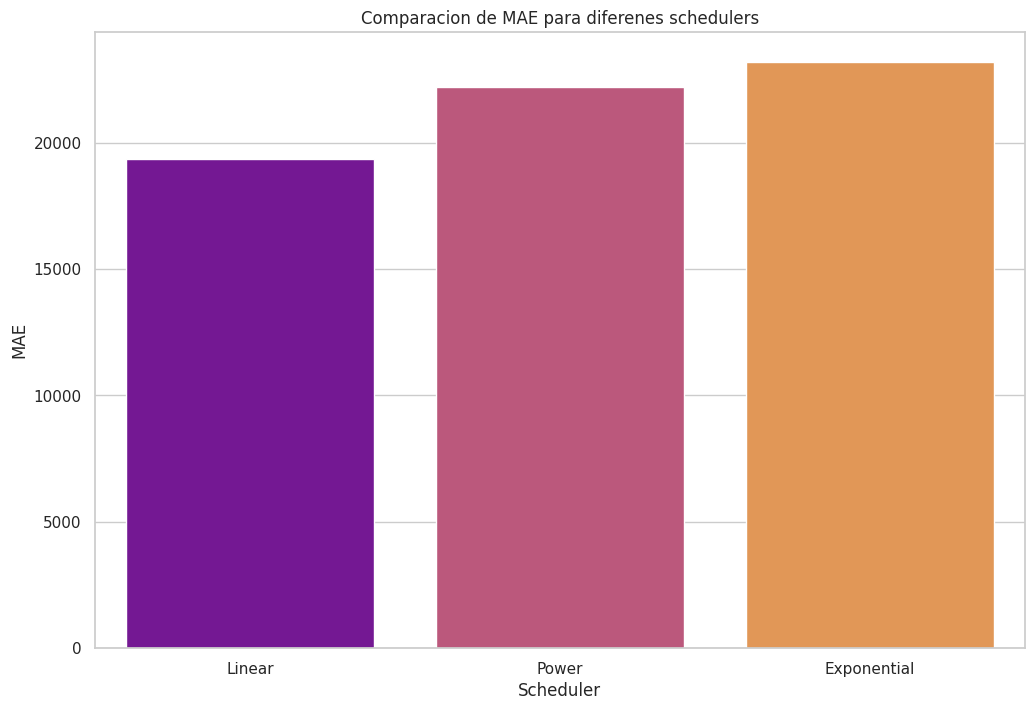

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='R2', data=metrics_consolidated_q2, palette='viridis')
plt.title('Comparacion de R2 para diferentes schedulers')
plt.xlabel('Scheduler')
plt.ylabel('R2')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='RMSE', data=metrics_consolidated_q2, palette='magma')
plt.title('Comparacion de RMSE para diferentes Schedulers')
plt.xlabel('Scheduler')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='MAE', data=metrics_consolidated_q2, palette='plasma')
plt.title('Comparacion de MAE para diferenes schedulers')
plt.xlabel('Scheduler')
plt.ylabel('MAE')
plt.show()

### 3. Implementacion de Regularizacion L2

**Objetivo**: Implementar la tecnica de regularizacion L2 en la red neuronal para evitar el sobreajuste. Ajustar el hiperparametro de regularizacion lambda utilizando el conjunto de validacion. Mostrar graficos de eror de entrenamiento y validacion para distintos valores de lambda.

In [10]:
lambda_values_q3 = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

scheduler_type_q3 = 'linear'
scheduler_params_q3 = {'final_lr' : 1e-7}

results_q3 = {}

for lambda_reg in lambda_values_q3:
    print(f'\nEntrenando con scheduler={scheduler_type_q3} y lambda_reg={lambda_reg}')

    log_file_q3 = os.path.join(logs_dir, f'training_{scheduler_type_q3}_lambda_{lambda_reg}.log')
    metrics_file_q3 = os.path.join(results_dir, f'evaluation_metrics_{scheduler_type_q3}_lambda_{lambda_reg}.csv')

    command_q3 = [
        python_executable,
        script_path,
        '--scheduler_type', scheduler_type_q3,
        '--lambda_reg', str(lambda_reg),
        '--log_file', log_file_q3,
        '--metrics_file', metrics_file_q3,
        '--num_epochs', '10',
        '--batch_size', '32'
    ]

    if scheduler_type_q3 == 'linear':
        command_q3 += ['--final_lr', str(scheduler_params_q3['final_lr'])]

    result_q3 = subprocess.run(command_q3, cwd=working_dir, capture_output=True, text=True)

    print("Salida estandar:")
    print(result_q3.stdout)
    print("Errores:")
    print(result_q3.stderr)

    # if os.path.exists(metrics_file_q3):
    #     metrics_df_q3 = pd.read_csv(metrics_file_q3)
    #     result_q3[lambda_reg] = metrics_df_q3
    # else:
    #     print(f"Archivo de metricas {metrics_file_q3} no encontrado")


Entrenando con scheduler=linear y lambda_reg=0
Salida estandar:
El script train.py ha comenzado a ejecutarse
modulos importados
Iniciando el script
Parseando argumentos..
Creando directorios..
Directorios creados.
entrando a funcion
Cantidad de parametros: 329
Comenzando la epoca 1
Epoca 1: Train Loss=0.1812, Val Loss=0.2246, RMSE=25167.1599, MAE=22063.5696, R2=-2.6165
Comenzando la epoca 2
Epoca 2: Train Loss=0.1797, Val Loss=0.2231, RMSE=25078.5048, MAE=21970.6958, R2=-2.5910
Comenzando la epoca 3
Epoca 3: Train Loss=0.1784, Val Loss=0.2217, RMSE=25001.3271, MAE=21889.8317, R2=-2.5690
Comenzando la epoca 4
Epoca 4: Train Loss=0.1773, Val Loss=0.2205, RMSE=24935.4066, MAE=21820.7232, R2=-2.5502
Comenzando la epoca 5
Epoca 5: Train Loss=0.1763, Val Loss=0.2195, RMSE=24880.5411, MAE=21763.1609, R2=-2.5346
Comenzando la epoca 6
Epoca 6: Train Loss=0.1756, Val Loss=0.2188, RMSE=24836.5783, MAE=21717.0107, R2=-2.5221
Comenzando la epoca 7
Epoca 7: Train Loss=0.1750, Val Loss=0.2182, RMSE=

### 4. Implementacion de distintos optimizadores

In [3]:
scheduler_type_q4 = 'linear'

optimizer_configs_q4 = {
    'sgd' : {'learning_rate' : 1e-5},
    'sgd_momentum' : {'learning_rate' : 1e-5, 'momentum' : 0.9},
    'adam' : {'learning_rate' : 1e-5, 'beta1' : 0.9, 'beta2' : 0.999, 'epsilon' : 1e-8},
    'mini_batch_sgd' : {'learning_rate' : 1e-5, 'batch_size' : 32}
}

lambda_reg_q4 = 0.0

results_q4 = {}

for optimizer_type, params in optimizer_configs_q4.items():

    log_file_q4 = os.path.join(logs_dir, f'training_{optimizer_type}_lambda_{lambda_reg_q4}.log')
    metrics_file_q4 = os.path.join(results_dir, f'evaluation_metrics_{optimizer_type}_lambda_{lambda_reg_q4}.csv')


    command_q4 = [
        python_executable,
        script_path,
        '--optimizer', optimizer_type,
        '--scheduler_type', scheduler_type_q4,
        '--lambda_reg', str(lambda_reg_q4),
        '--log_file', log_file_q4,
        '--metrics_file', metrics_file_q4,
        '--num_epochs', '50', 
        '--final_lr', '0.001',
        '--learning_rate', str(params['learning_rate'])
    ]

    if optimizer_type == 'sgd_momentum':
        command_q4 += ['--momentum', str(params['momentum'])]
    elif optimizer_type == 'adam':
        command_q4 += [
            '--beta1', str(params['beta1']), 
            '--beta2', str(params['beta2']), 
            '--epsilon', str(params['epsilon'])
            ]
    elif optimizer_type == 'mini_batch_sgd':
        command_q4 += ['--batch_size', str(params['batch_size'])]

    print(f"Ejecutando entrenamiento con optimizador: {optimizer_type}... ")
    result_q4 = subprocess.run(command_q4, cwd=working_dir, capture_output=True, text=True)

    print("Salida estandar:")
    print(result_q4.stdout)
    print("Errores:")
    print(result_q4.stderr)

    if os.path.exists(metrics_file_q4):
        metrics_df_q4 = pd.read_csv(metrics_file_q4)
        results_q4[optimizer_type] = metrics_df_q4

        plt.figure(figsize=(10, 5))
        plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Train Loss'], label='Entrenamiento')
        plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Val Loss'], label='Validacion')
        plt.xlabel('Epocas')
        plt.ylabel('Perdida (MSE)')
        plt.title(f'Curvas de perdida para optimizador {optimizer_type} (lambda={lambda_reg_q4})')
        plt.legend()
        plt.grid(True)
        plot_filename = os.path.join(results_dir, f'loss_curves_{optimizer_type}_lambda_{lambda_reg_q4}.png')
        plt.savefig(plot_filename)
        plt.close()
        print(f"Grafico guardado en {plot_filename}")
    else:
        print(f'Archivo de metricas {metrics_file_q4} no encontrado.')



Ejecutando entrenamiento con optimizador: sgd... 
Salida estandar:
El script train.py ha comenzado a ejecutarse
modulos importados
Iniciando el script
entrando a funcion
Cantidad de parametros: 329
Comenzando la epoca 1
Epoca 1: Train Loss=0.1726, Val Loss=0.0980, RMSE=16609.6069, MAE=13259.7068, R2=-0.7963
Comenzando la epoca 2
Epoca 2: Train Loss=0.0980, Val Loss=0.0649, RMSE=13509.3370, MAE=10685.3307, R2=-0.1883
Comenzando la epoca 3
Epoca 3: Train Loss=0.0684, Val Loss=0.0552, RMSE=12458.3469, MAE=10074.6710, R2=-0.0106
Comenzando la epoca 4
Epoca 4: Train Loss=0.0570, Val Loss=0.0534, RMSE=12260.1125, MAE=10023.9694, R2=0.0213
Comenzando la epoca 5
Epoca 5: Train Loss=0.0527, Val Loss=0.0540, RMSE=12325.5276, MAE=10101.1048, R2=0.0108
Comenzando la epoca 6
Epoca 6: Train Loss=0.0511, Val Loss=0.0550, RMSE=12437.0459, MAE=10174.3458, R2=-0.0072
Comenzando la epoca 7
Epoca 7: Train Loss=0.0505, Val Loss=0.0558, RMSE=12531.4904, MAE=10228.7898, R2=-0.0225
Comenzando la epoca 8
Epoca